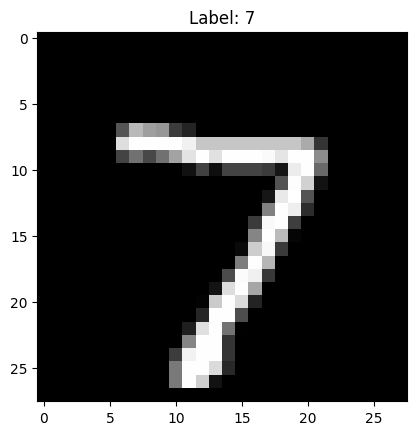

In [1]:
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import torch
import onnx

transform = transforms.Compose([transforms.ToTensor()])
test_loader = torch.utils.data.DataLoader(datasets.MNIST('./train/data', train=False, transform=transform,download=True),
                                        batch_size=1000, shuffle=False)
# Extract a single image from the validation set
data_iter = iter(test_loader)
images, labels = next(data_iter)
image = images[0].numpy().squeeze() # normal gets 6, 4 ,8 wrong --> quantized gets same wrong.
label = labels[0].item()

# Plot the image
plt.imshow(image, cmap='gray')
plt.title(f'Label: {label}')
plt.show()

Integer Model Performance

In [4]:
import numpy as np
from engine import StarterModel

# Initialize model



for useInt in [False,True]:
    correct = 0
    total = 0
    mod = StarterModel("train/model.onnx", useInt)
    for images, labels in test_loader:
        # Convert images to numpy array and preprocess
        images_np = images.numpy()
        processed_images = images_np
        if useInt:
            processed_images = (images_np * 255).astype(np.int32)
        
        # Remove channel dimension (batch, 1, 28, 28) -> (batch, 28, 28)
        processed_images = processed_images.squeeze(axis=1)
        
        # Iterate through each image in the batch
        for i in range(len(processed_images)):
            img = processed_images[i]
            true_label = labels[i].item()
            
            # Get prediction
            output = mod.infer(img)
 
            # Update counts
            if output == true_label:
                correct += 1
        total += labels.size(0)

    # Calculate accuracy
    accuracy = correct / total
    
    print("{0}".format("Integer" if useInt else "Float"))
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

Float
Test Accuracy: 87.56%
Integer
Test Accuracy: 10.81%
